In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Реализация Перцептрона

In [2]:
class Perceptron:
    """Классификатор на основе персепртона
       
       Параметры
       ----------
         eta  : float => темп обучения [0,1]
       epochs :  int  => проходы по тренировочному набору данных в случае не сходимости
       ----------
       Атрибуты
       --------
          w_  : одномерный массив => весовые коэффициенты
       errors :      список       => число случаев ошибочной классификации в каждой эпохе
       --------
       """
    
    def __init__(self, eta = .01, epochs = 10):
        self.eta = eta
        self.epochs = epochs
    
    
    def net_input(self, X):
        """Расчет чистого входа"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    
    def predict(self, X):
        """Возрат метки класса после едичного скачка"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)
    

    def fit(self, X, y) -> object:
        """Подгонка модели под тренировачные данные
            
           Параметры
           ---------
           X : [множество обьектов, множество фич]
           y : [целевая переменная]
           ---------
           """
        
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        
        for _ in range(self.epochs):
            
            errors = 0
            
            for xi, yi in zip(X, y):
                
                update = self.eta * (yi - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0]  += update
                errors      += int(update != 0.0)
            
            self.errors_.append(errors)
            
        return self

# Загрузка данных

In [3]:
!wget https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv

--2020-10-25 18:02:27--  https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.112.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.112.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3716 (3.6K) [text/plain]
Saving to: ‘iris.csv.3’

iris.csv.3          100%[===================>]   3.63K  --.-KB/s    in 0s      

2020-10-25 18:02:27 (12.1 MB/s) - ‘iris.csv.3’ saved [3716/3716]



In [4]:
data = pd.read_csv('iris.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
data.iloc[0, 4]

'setosa'

# Подготовка данных

In [6]:
y = data.iloc[:, 4].values
y[:10]

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa'], dtype=object)

In [7]:
data_y = [np.where(y == i, -1, 1) for i in data.iloc[:, 4].unique()]
data_y[:10]

[array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1]),
 array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1

In [8]:
X = data.iloc[:, [0,2]].values.astype(float)
X[:10]

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4],
       [5.4, 1.7],
       [4.6, 1.4],
       [5. , 1.5],
       [4.4, 1.4],
       [4.9, 1.5]])

# Визуализация данных

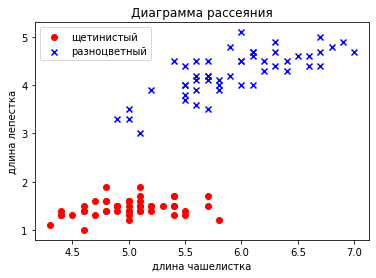

In [9]:
plt.scatter(X[:50, 0], X[:50, 1],
            color ='red', marker = 'o', label = 'щетинистый')
plt.scatter(X[50:100, 0], X[50:100, 1],
           color = 'blue', marker = 'x', label = 'разноцветный')
plt.xlabel('длина чашелистка')
plt.ylabel('длина лепестка')
plt.title('Диаграмма рассеяния')
plt.legend(loc = 'upper left')
plt.show();

# Обучение модели

In [10]:
ppn = Perceptron(eta=0.1, epochs=6)
ppn.fit(X, data_y[0])

# Визуализация обучения 

In [ ]:
plt.plot(range(1, len(ppn.errors_) + 1) , ppn.errors_, marker='o')
plt.xlabel('Эпохи')
plt.ylabel('Число случаев ошибочной классификации ')
plt.show();

In [ ]:
ppn.w_

# Визуализация линйеной гиперплоскости в бинарной классификации

In [ ]:
def plot_decision_regions(X, y, classifier, resolutions=.02):
    # настройка генератора маркеров и палитры
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # вывод поверхности решения
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolutions),
                           np.arange(x2_min, x2_max, resolutions))
    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, z , alpha = .4, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # показать образцы классов
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y = X[y == cl, 1],
                    alpha = .8, c = cmap(idx),
                    marker=markers[idx], label = cl)

In [ ]:
plot_decision_regions(X, y, classifier=ppn)
plt.title('Визуализация границы в бинарной классификации')
plt.xlabel('длина чашелистка(см)')
plt.ylabel('длина лепестка(см)')
plt.legend(loc='upper left')
plt.show();

# Использование стратегии "один против всех" для распотсраненния бинарного классификатора на задачу многоклассовой классификации

In [ ]:
setosa_model = Perceptron(eta=0.1, epochs=6)
setosa_model.fit(X, data_y[0])
vergicolor_model = Perceptron(eta=0.1, epochs=6)
vergicolor_model.fit(X, data_y[1])
virginica_model = Perceptron(eta=0.1, epochs=6)
virginica_model.fit(X, data_y[2])

In [ ]:
def multi_predict(el):
    res = {i : j for i, j in zip(
    data.iloc[:,4].unique(),
    [setosa_model.net_input(el), vergicolor_model.net_input(el), virginica_model.net_input(el)])
      }
    return min(res, key=res.get)

In [ ]:
output_multi = pd.DataFrame({'Predict': [multi_predict(i) for i in X]})
output_multi.iloc[[1,-1]]

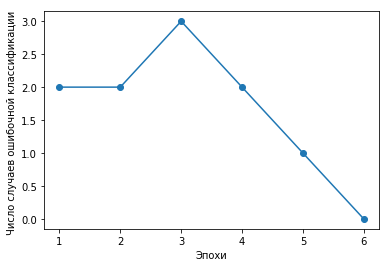

In [11]:
output_multi = pd.DataFrame({'Predict': [multi_predict(i) for i in X]})
output_multi.iloc[[1,-1]]

In [12]:
ppn.w_

array([-0.4 , -0.68,  1.82])

# Визуализация линйеной гиперплоскости в бинарной классификации

In [13]:
def plot_decision_regions(X, y, classifier, resolutions=.02):
    # настройка генератора маркеров и палитры
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # вывод поверхности решения
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolutions),
                           np.arange(x2_min, x2_max, resolutions))
    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, z , alpha = .4, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # показать образцы классов
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y = X[y == cl, 1],
                    alpha = .8, c = cmap(idx),
                    marker=markers[idx], label = cl)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


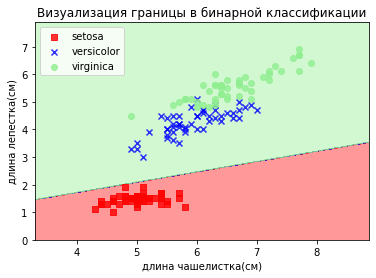

In [14]:
plot_decision_regions(X, y, classifier=ppn)
plt.title('Визуализация границы в бинарной классификации')
plt.xlabel('длина чашелистка(см)')
plt.ylabel('длина лепестка(см)')
plt.legend(loc='upper left')
plt.show();

# Использование стратегии "один против всех" для распотсраненния бинарного классификатора на задачу многоклассовой классификации

In [15]:
setosa_model = Perceptron(eta=0.1, epochs=6)
setosa_model.fit(X, data_y[0])
vergicolor_model = Perceptron(eta=0.1, epochs=6)
vergicolor_model.fit(X, data_y[1])
virginica_model = Perceptron(eta=0.1, epochs=6)
virginica_model.fit(X, data_y[2])

In [16]:
def multi_predict(el):
    res = {i : j for i, j in zip(
    data.iloc[:,4].unique(),
    [setosa_model.net_input(el), vergicolor_model.net_input(el), virginica_model.net_input(el)])
      }
    return min(res, key=res.get)

In [17]:
output_multi = pd.DataFrame({'Predict': [multi_predict(i) for i in X]})
output_multi.iloc[[1,-1]]

,Predict
1,setosa
149,virginica
